In [1]:
import os
os.chdir('/home/jupyter/ntu/csie-cv/hw2')
from PIL import Image
import numpy as np
import copy
from collections import defaultdict
import cv2

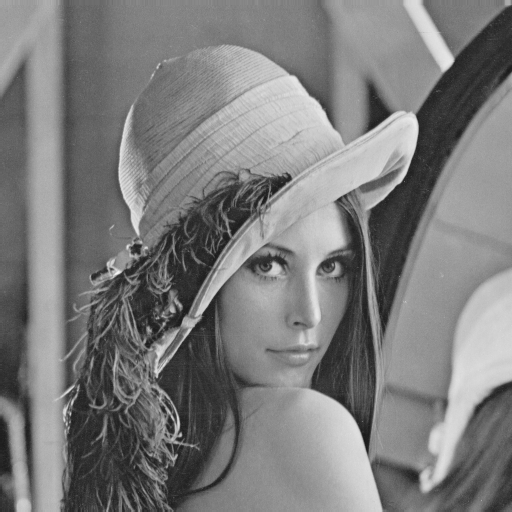

In [2]:
img = Image.open('./lena.bmp')
img

In [3]:
img_array = np.array(img)
width, height = img_array.shape
img_list = img_array.tolist()

# 1. Binarize 

### method a: sequensial

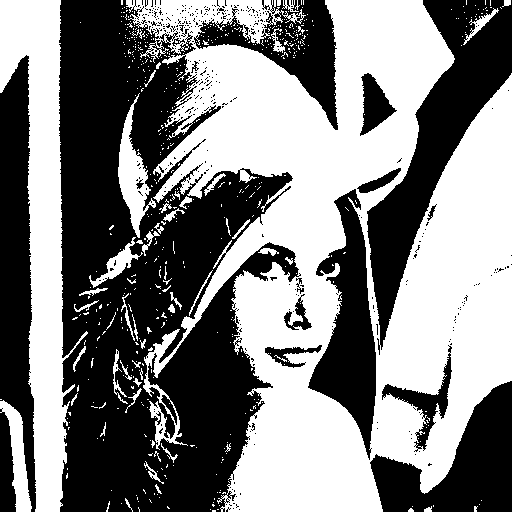

In [4]:
result = copy.deepcopy(img_list)

for y in range(height):
    for x in range(width):
        result[y][x] = 255 if result[y][x] > 128 else 0

img_ = Image.fromarray(np.array(result, dtype='uint8'), mode='L')
img_.save('./lena_binarize.bmp')
img_

# 2. histogram

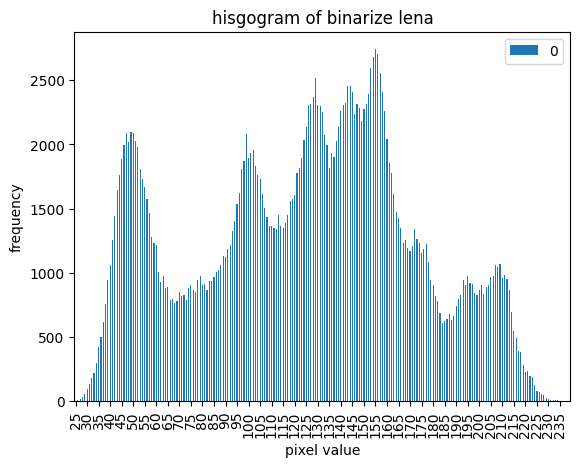

In [5]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


result = img_array.copy()
histogram = dict()

for y in range(height):
    for x in range(width):
        bin = histogram.get(result[y][x], 0)
        histogram[result[y][x]]  = bin + 1

histogram = dict(sorted(histogram.items(), key=lambda x: x[0]))
df = pd.DataFrame({k:[v] for k,v in histogram.items()}).T#.plot.bar(x='lab', y='val', rot=0)

ax = df.plot.bar(title='hisgogram of binarize lena', xlabel='pixel value', ylabel='frequency')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.savefig('histogram.png')

# 3. Connected Component

In [6]:
img = Image.open('./lena.bmp')
img_array = np.array(img)
img_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
width, height = img_array.shape
img_list = img_array.tolist()

result = copy.deepcopy(img_list)

for y in range(height):
    for x in range(width):
        result[y][x] = 255 if result[y][x] > 128 else 0

# result = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255],
#           [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255],
#           [0,0,0,0,0,0,0,0,255,255,255,255,255,255,0,0,0,0,0,0,0,255],
#           [0,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,0,0,0,0,255],
#           [0,0,0,0,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,255],
#           [0,0,0,0,0,0,0,255,255,255,0,0,255,0,0,0,0,0,0,0,0,255],
#           [0,0,0,0,0,0,0,255,255,255,0,0,255,0,0,0,0,0,0,0,0,255],
#           [0,0,0,0,0,0,0,255,255,255,255,255,255,255,0,0,0,0,0,0,0,255],
#           [0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0,0,255],
#           [0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0,0,255],
#           [0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,255],
#           [0,0,0,0,0,0,0,0,0,255,0,0,255,255,255,0,0,0,0,0,0,255],
#           [0,0,255,0,0,255,255,0,255,255,0,0,255,255,255,0,0,0,0,0,0,255],
#           [255,255,255,0,0,255,255,0,255,0,0,0,0,255,255,0,0,0,0,0,0,255],
#           [0,0,255,0,0,255,255,0,255,0,0,255,255,255,0,0,0,0,0,0,0,255],
#           [0,0,255,0,0,255,255,0,255,0,0,0,255,255,0,0,0,0,0,0,0,255],
#           [0,0,255,0,0,255,255,0,255,0,0,0,0,255,0,0,0,0,0,0,0,255],
#           [255,255,255,255,255,255,255,255,255,255,0,0,0,255,0,0,0,0,0,0,0,255],
#           [255,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0,0,255],
#           [255,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0,0,255],
#           [255,0,0,0,0,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,255],
#           [255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255],
#           [255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255],
#           [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],]

# height, width = 24, 22
          


# result = [[255,0,0,255,0,255],
#           [255,255,0,255,0,255],
#           [255,0,255,255,0,255],
#           [0,0,255,0,255,255],]
# height, width = 4, 6

#### Generate connected component

In [7]:
for y in range(height):
    for x in range(width):
          result[y][x] = 1 if result[y][x] == 255 else 0

parent = [i for i in range(width*height)]

def parent_(parent):
    return [[f'{parent[x+y*width]:2d}' for x in range(width)] for y in range(height)]

def union_find(x):
    origin_x =x
    while parent[x] != x:
        x = parent[x]
    
    parent[origin_x] = x
    return x

# connected components + path compressiion
label = 2
for y in range(height):
    for x in range(width):
        left_set, up_set = False, False
        if result[y][x] == 1:
            if x > 0 and result[y][x-1] > 1:
                # if left pixel is set before
                # set current pixel to letf pixel's root label
                result[y][x] = union_find(result[y][x-1])
                left_set = True
            
            if y > 0 and result[y-1][x] > 1:
                # if up pixel is set before
                if left_set:
                    # if current pixel's left pixel is set before, set current pixel's parent to up pixel's root label
                    parent[result[y][x]] = union_find(result[y-1][x])
                else:
                    # if current pixel's left not set, set current pixel to letf pixel's root label
                    result[y][x] = union_find(result[y-1][x]) #result[y-1][x] 
                up_set = True

            if not left_set and not up_set:
                # for the left most pixel 
                result[y][x] = label
                label += 1



# merge components
# record bounding box and center
def default_dict():
    return {'count':0, 'center x':0, 'center y':0, 'left':float('inf'), 'right':float('-inf'), 'up':float('inf'), 'down':float('-inf'), 'pixels':list()}

box = defaultdict(default_dict)
for y in range(height):
    for x in range(width):
        if result[y][x] > 1:
            result[y][x] = union_find(result[y][x])

            cc = result[y][x]
            box[cc]['left'], box[cc]['right'] = min(box[cc]['left'], x), max(box[cc]['right'], x)
            box[cc]['up'], box[cc]['down'] = min(box[cc]['up'], y), max(box[cc]['down'], y)
            box[cc]['center x'] += x
            box[cc]['center y'] += y
            box[cc]['count'] += 1
            box[cc]['pixels'].append((y, x))


# get number of components
# get bounding box and center
num_of_cc = max(box) 
for cc in box:
    box[cc]['center x'] = round(box[cc]['center x']/box[cc]['count'])
    box[cc]['center y'] = round(box[cc]['center y']/box[cc]['count'])



#### Draw bounding box

In [8]:
# colors for component
colors = [(255,128,0), (255,0,255), (128,0,255), (128,255,0), (255,0,128), (0,0,255), (255,255,0), (255,0,0), (128,128,128), (0,255,0), (0,255,128), 
          (0,255,255), (0,128,255)]

# draw the result rectangle
def draw_rect(img, l, r, u, d, color):
    cv2.rectangle(img, (l, u), (r, d), color, 2)

# draw the result centroid
SHIFT = 10
def draw_cent(img, y, x, color):
    cv2.line(img, (x - SHIFT, y), (x + SHIFT, y), color, 4)
    cv2.line(img, (x, y - SHIFT), (x, y + SHIFT), color, 4)

True

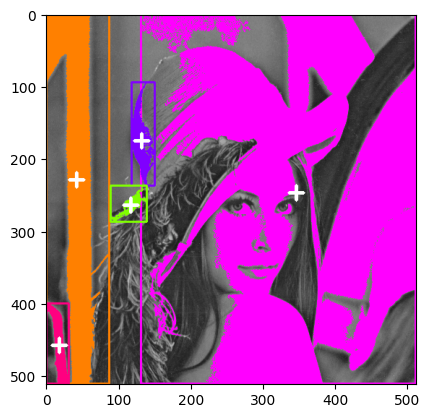

In [9]:
big_cc = [cc for cc in box if box[cc]['count'] > 500]
# big_cc has cc size > 500
for i, cc in enumerate(big_cc):
    for (y, x) in box[cc]['pixels']:
        img_rgb[y, x] = colors[i]


    l, r, u, d = box[cc]['left'], box[cc]['right'], box[cc]['up'], box[cc]['down']
    cx, cy = box[cc]['center x'], box[cc]['center y']
    draw_rect(img_rgb, l, r, u, d, colors[i])
    draw_cent(img_rgb, cy, cx, (255, 255, 255))

plt.imshow(img_rgb)
cv2.imwrite('./lena_connected_components.png', cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))